# Evaluation

As a follow-on from my [previous project on football betting]("https://github.com/maxantcliff/football_poisson_2/blob/master/football_poisson_2.ipynb"), this is an evaluation of how good the very basic poisson distribution that I apply to the premier league to try and place some profitable bets is. 

We already know the answer is that it's pretty poor - the below is a graphical analysis confirming this!

In [10]:
# Import some packages first & define the poisson as usual
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
os.chdir('/Users/maxantcliff/Desktop/Python')
pd.set_option("display.max.columns", None)
pd.options.mode.chained_assignment = None
def poisson(actual, mean):
    return(mean**actual*math.exp(-mean))/math.factorial(actual)

## Whole Seasons

The function below uses the average number of home and away goals in the current season as the mean for the poisson, then calculates from this the probability of an occurence of a given number of home and away goals in a match. This is plotted as the line chart. 

Concurrently, it plots a histogram of the actual frequencies of home and away goals. 

An eyeballing of this shows that it's not amazing, but equally not terrible either. This is for all matches though. 

In [17]:
def whole_season_plot(data_year):
    data=pd.read_csv('data/EPL/%d.csv'%(data_year),usecols=['HomeTeam','AwayTeam','FTHG','FTAG'])
    goals=8
    poiss= np.zeros([goals,2])
    for i in range(goals):
        poiss[i,0]=poisson(i, data.mean()['FTHG'])
        poiss[i,1]=poisson(i, data.mean()['FTAG'])
    poisson_pred=pd.DataFrame(data=poiss, columns=['Home','Away'])
    plt.hist(data[['FTHG','FTAG']].values, range(goals), density=True, label=['Home','Away']
             ,alpha=0.6, color=['Red','Blue'])
    plt.xticks([i-0.5 for i in range(1,goals+2)],[i for i in range(goals+2)])
    plt.ylim([0, 0.4])
    plt.ylabel("Proportion of Matches")
    plt.title("Goals per Match: Actual vs. Poisson Prediction (20{}/{} Season)".format(data_year,data_year+1))
    plt.xlabel("Goals per Match")
    plt.plot([i-0.66 for i in range(1,goals+1)],poisson_pred['Home'], label='Home', linestyle='-', marker='o',color='red')
    plt.plot([i-0.33 for i in range(1,goals+1)],poisson_pred['Away'],label='Away',linestyle='-', marker='o', color='blue')
    leg=plt.legend(loc='upper right', fontsize=9, ncol=2)
    leg.set_title("Poisson           Actual      ", prop = {'size':'10', 'weight':'bold'})

With the function defined, just enter the first year of the season you would like to see the plot for:

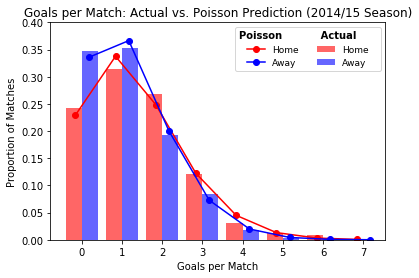

In [18]:
whole_season_plot(14)

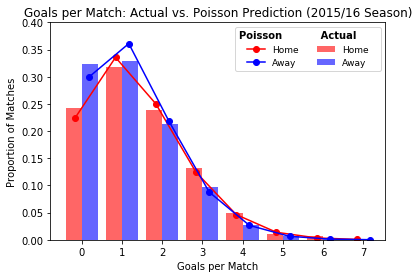

In [19]:
whole_season_plot(15)

## Evaluating for Specific Teams

Essentially the same again, but plotting for a particular team.